**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: (LINK NEEDS FIXING!)

[Lab16](https://atomickitty.ddns.net:8000/user/sensei/files/engr-1330-webroot/engr-1330-webbook/ctds-psuedocourse/docs/8-Labs/Lab8/Lab9_Dev.ipynb?_xsrf=2%7C1b4d47c3%7C0c3aca0c53606a3f4b71c448b09296ae%7C1623531240)

___

# <font color=darkred>Laboratory 16: "Functions for Probability Modeling"</font>

In [3]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

DESKTOP-EH6HD63
desktop-eh6hd63\farha
C:\Users\Farha\Anaconda3\python.exe
3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)


## Full name: 
## R#: 
## Title of the notebook:
## Date:
___

![](https://qph.fs.quoracdn.net/main-qimg-5436df4f7719276c692a841e1afb72a6)



### Important Terminology:
__Population:__ In statistics, a population is the entire pool from which a statistical sample is drawn. A population may refer to an entire group of people, objects, events, hospital visits, or measurements. <br>
__Sample:__ In statistics and quantitative research methodology, a sample is a set of individuals or objects collected or selected from a statistical population by a defined procedure. The elements of a sample are known as sample points, sampling units or observations.<br>
__Distribution (Data Model):__ A data distribution is a special function or a listing which shows all the possible values (or intervals) of the data. It also (and this is important) tells you how often each value occurs. <br>

__*From https://www.investopedia.com/terms*__<br>
__*https://www.statisticshowto.com/data-distribution/*__

### Important Steps in going from samples to population:
1. __Get descriptive statistics- mean, variance, std. dev.__
2. __Use plotting position formulas (e.g., weibull, gringorten, cunnane) and plot the SAMPLES (data you already have)__
3. __Use different data models (e.g., normal, log-normal, Gumbell) and find the one that better FITs your samples- Visual or Numerical__
4. __Use the data model that provides the best fit to infer about the POPULATION__

# Estimate the magnitude of the annual peak flow at Spring Ck near Spring, TX.

The file `08068500.pkf` is an actual WATSTORE formatted file for a USGS gage at Spring Creek, Texas. The first few lines of the file look like:

    Z08068500                       USGS 
    H08068500       3006370952610004848339SW12040102409    409     72.6             
    N08068500       Spring Ck nr Spring, TX
    Y08068500       
    308068500       19290530  483007              34.30        1879          
    308068500       19390603    838               13.75                    
    308068500       19400612   3420               21.42                    
    308068500       19401125  42700               33.60                    
    308068500       19420409  14200               27.78                    
    308068500       19430730   8000               25.09                    
    308068500       19440319   5260               23.15                    
    308068500       19450830  31100               32.79                    
    308068500       19460521  12200               27.97                 
    
The first column are some agency codes that identify the station , the second column after the fourth row is a date in YYYYMMDD format, the third column is a discharge in CFS, the fourth and fifth column are not relevant for this laboratory exercise.  The file was downloadef from

https://nwis.waterdata.usgs.gov/tx/nwis/peak?site_no=08068500&agency_cd=USGS&format=hn2

In the original file there are a couple of codes that are manually removed:

- 19290530  483007;  the trailing 7 is a code identifying a break in the series (non-sequential)
- 20170828  784009; the trailing 9 identifies the historical peak

The laboratory task is to fit the data models to this data, decide the best model from visual perspective, and report from that data model the magnitudes of peak flow associated with the probebilitiess below (i.e. populate the table)

|Exceedence Probability|Flow Value|Remarks|
|:---|:---|:---|
|25% |????| 75% chance of greater value|           
|50% |????| 50% chance of greater value|            
|75% |????| 25% chance of greater value|            
|90% |????| 10% chance of greater value|
|99% |????| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|????| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|????| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

The first step is to read the file, skipping the first part, then build a dataframe:


In [50]:
# Read the data file
amatrix = [] # null list to store matrix reads
rowNumA = 0
matrix1=[]
col0=[]
col1=[]
col2=[]
with open('08068500.pkf','r') as afile:
    lines_after_4 = afile.readlines()[4:]
afile.close() # Disconnect the file
howmanyrows = len(lines_after_4)
for i in range(howmanyrows):
    matrix1.append(lines_after_4[i].strip().split())
for i in range(howmanyrows):
    col0.append(int(matrix1[i][0]))
    col1.append(matrix1[i][1])
    col2.append(int(matrix1[i][2])) #We need to conver it to integers 
# col2 is date, col3 is peak flow
#now build a datafranem

In [51]:
import pandas 
df = pandas.DataFrame(col0)
df['date']= col1
df['flow']= col2

In [52]:
df.head()

,0,date,flow
0,308068500,19290530,48300
1,308068500,19390603,838
2,308068500,19400612,3420
3,308068500,19401125,42700
4,308068500,19420409,14200


Now explore if you can plot the dataframe as a plot of peaks versus date.

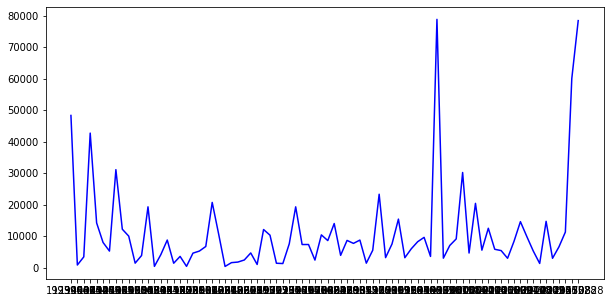

In [53]:
import matplotlib.pyplot # the python plotting library
import numpy as np

date = df['date']
flow = df['flow']

# Plot here
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate an object from the figure class, set aspect ratio

matplotlib.pyplot.plot(date,flow, color ='blue')



From here on you can proceede using the lecture notebook as a go-by, although you should use functions as much as practical to keep your work concise

In [23]:
# Descriptive Statistics
flow.describe()

count       80.000000
mean     11197.800000
std      15022.831582
min        381.000000
25%       3360.000000
50%       7190.000000
75%      11500.000000
max      78800.000000
Name: flow, dtype: float64

In [54]:
# Weibull Plotting Position Function
# sort the flow in place!
flow1 = np.array(flow)
flow1.sort()
# built a relative frequency approximation to probability, assume each pick is equally likely
weibull_pp = []
for i in range(0,len(flow1),1):
    weibull_pp.append((i+1)/(len(flow1)+1))

In [55]:
print(flow1)

[  381   407   408   838  1010  1300  1330  1400  1400  1420  1430  1590
  1770  2400  2430  2970  2970  3010  3150  3180  3420  3560  3570  3850
  3900  4130  4600  4640  4660  5260  5260  5280  5410  5520  5550  5830
  5980  6600  6720  7040  7340  7340  7500  7560  7700  8000  8230  8350
  8590  8640  8750  8760  9120  9610  9860 10000 10300 10400 10700 11300
 12100 12200 12500 14000 14200 14600 14700 15400 19300 19300 20400 20700
 23300 30200 31100 42700 48300 60000 78400 78800]


In [56]:
print(weibull_pp)

[0.012345679012345678, 0.024691358024691357, 0.037037037037037035, 0.04938271604938271, 0.06172839506172839, 0.07407407407407407, 0.08641975308641975, 0.09876543209876543, 0.1111111111111111, 0.12345679012345678, 0.13580246913580246, 0.14814814814814814, 0.16049382716049382, 0.1728395061728395, 0.18518518518518517, 0.19753086419753085, 0.20987654320987653, 0.2222222222222222, 0.2345679012345679, 0.24691358024691357, 0.25925925925925924, 0.2716049382716049, 0.2839506172839506, 0.2962962962962963, 0.30864197530864196, 0.32098765432098764, 0.3333333333333333, 0.345679012345679, 0.35802469135802467, 0.37037037037037035, 0.38271604938271603, 0.3950617283950617, 0.4074074074074074, 0.41975308641975306, 0.43209876543209874, 0.4444444444444444, 0.4567901234567901, 0.4691358024691358, 0.48148148148148145, 0.49382716049382713, 0.5061728395061729, 0.5185185185185185, 0.5308641975308642, 0.5432098765432098, 0.5555555555555556, 0.5679012345679012, 0.5802469135802469, 0.5925925925925926, 0.604938271

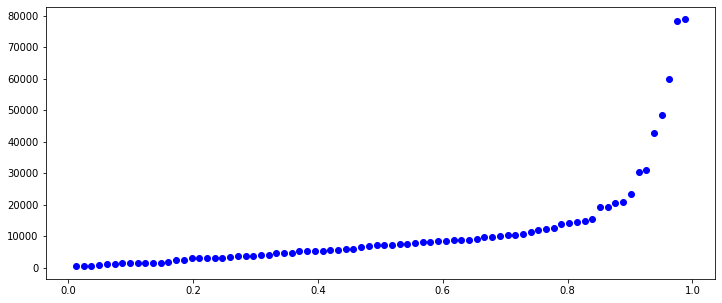

In [59]:
myfigure = matplotlib.pyplot.figure(figsize = (12,5)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, flow1 ,color ='blue') 

> __What is Weibull function?__
The Weibull plotting position for the rth ranked (from largest to smallest) datum from a sample of size n is the quotient <br>
r / (n+1) <br>
It is recommended for use __when the form of the underlying distribution is unknown__ and when unbiased exceedance probabilities are desired. <br>
*From Glossary of Meteorology @ https://glossary.ametsoc.org/wiki/Weibull_plotting_position#:~:text=The%20Weibull%20plotting%20position%20for,unbiased%20exceedance%20probabilities%20are%20desired*

In [60]:
# Normal Quantile Function
import math

def normdist(x,mu,sigma):
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist

mu = flow1.mean() # Fitted Model
sigma = flow1.std()
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(flow1) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 


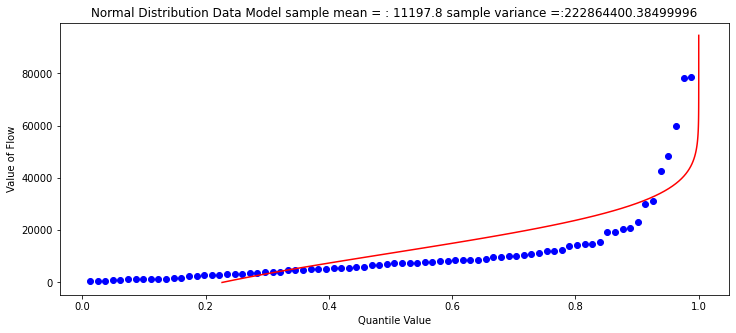

In [63]:
# Fitting Data to Normal Data Model 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (12,5)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, flow1 ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of Flow") 
mytitle = "Normal Distribution Data Model sample mean = : " + str(mu)+ " sample variance =:" + str(sigma**2)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

## Normal Distribution Data Model
|Exceedence Probability|Flow Value|Remarks|
|:---|:---|:---|
|25% |????| 75% chance of greater value|           
|50% |????| 50% chance of greater value|            
|75% |????| 25% chance of greater value|            
|90% |????| 10% chance of greater value|
|99% |????| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|????| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|????| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

<hr>

In [29]:
from scipy.optimize import newton

myguess = 1200
def f(x):
    mu = flow1.mean()
    sigma = flow1.std()
    quantile = 0.25
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(newton(f, myguess),mu,sigma))

#############################
def f(x):
    mu = flow1.mean()
    sigma = flow1.std()
    quantile = 0.50
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(newton(f, myguess),mu,sigma))
#############################
def f(x):
    mu = flow1.mean()
    sigma = flow1.std()
    quantile = 0.75
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(newton(f, myguess),mu,sigma))
#############################
def f(x):
    mu = flow1.mean()
    sigma = flow1.std()
    quantile = 0.90
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(newton(f, myguess),mu,sigma))
#############################
def f(x):
    mu = flow1.mean()
    sigma = flow1.std()
    quantile = 0.998
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(newton(f, myguess),mu,sigma))
#############################
def f(x):
    mu = flow1.mean()
    sigma = flow1.std()
    quantile = 0.999
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(newton(f, myguess),mu,sigma))

1128.5828928044123
0.2499999999999999
11197.800000000001
0.5
21267.01710719559
0.7500000000000001
30329.626604901816
0.9
54164.850888691755
0.998
57330.776807175724
0.9990000000000001


|Exceedence Probability|Flow Value|Remarks|
|:---|:---|:---|
|25% |1128.58| 75% chance of greater value|           
|50% |11197.80| 50% chance of greater value|            
|75% |30329.63| 25% chance of greater value|            
|90% |54164.85| 10% chance of greater value|
|99% |????| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|54164.85| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|57330.78| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

<hr>

In [64]:
# Log-Normal Quantile Function
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))

flow2 = df['flow'].apply(loggit).tolist() # put the peaks into a list
flow2_mean = np.array(flow2).mean()
flow2_variance = np.array(flow2).std()**2
flow2.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(flow2),1):
    weibull_pp.append((i+1)/(len(flow2)+1))
################
mu = flow2_mean # Fitted Model in Log Space
sigma = math.sqrt(flow2_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(flow2) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 

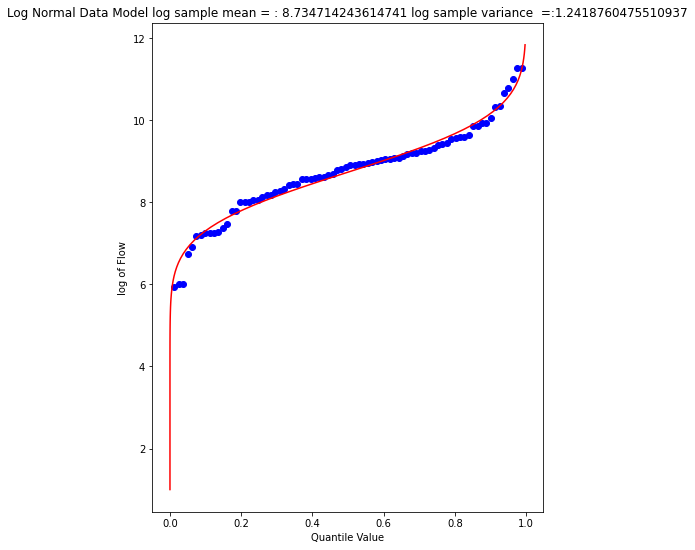

In [65]:
# Fitting Data to Log-Normal Data Model
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, flow2 ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("log of Flow") 
mytitle = "Log Normal Data Model log sample mean = : " + str(flow2_mean)+ " log sample variance  =:" + str(flow2_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

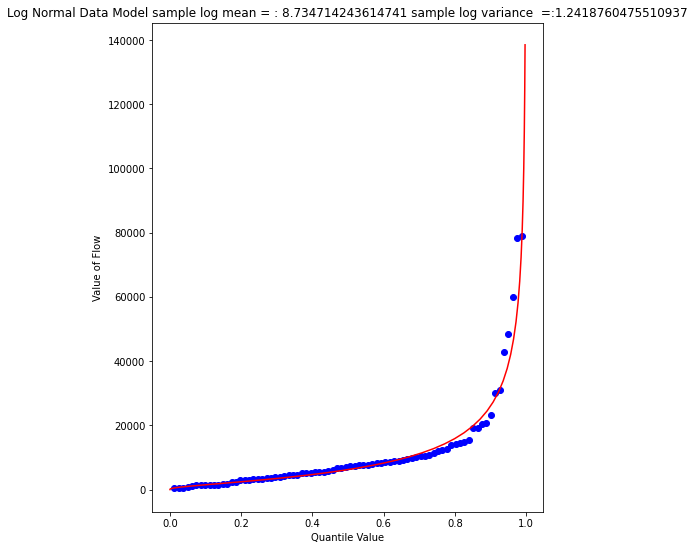

In [66]:
def antiloggit(x):  # A prototype function to log transform x
    return(math.exp(x))

flow3 = df['flow'].tolist() # pull original list
flow3.sort() # sort in place
################
mu = flow2_mean # Fitted Model in Log Space
sigma = math.sqrt(flow2_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(flow2) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(antiloggit(xlow + i*xstep))
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, flow3 ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of Flow") 
mytitle = "Log Normal Data Model sample log mean = : " + str((flow2_mean))+ " sample log variance  =:" + str((flow2_variance))
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

## Log-Normal Distribution Data Model
|Exceedence Probability|Flow Value|Remarks|
|:---|:---|:---|
|25% |????| 75% chance of greater value|           
|50% |????| 50% chance of greater value|            
|75% |????| 25% chance of greater value|            
|90% |????| 10% chance of greater value|
|99% |????| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|????| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|????| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

<hr>

In [34]:
from scipy.optimize import newton
myguess = 4000

def f(x):
    mu = 8.734714243614741
    sigma = 1.1143949244101454
    quantile = 0.25
    argument = (loggit(x) - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(loggit(newton(f, myguess)),mu,sigma))
##################################################
def f(x):
    mu = 8.734714243614741
    sigma = 1.1143949244101454
    quantile = 0.50
    argument = (loggit(x) - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(loggit(newton(f, myguess)),mu,sigma))
##################################################
def f(x):
    mu = 8.734714243614741
    sigma = 1.1143949244101454
    quantile = 0.75
    argument = (loggit(x) - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(loggit(newton(f, myguess)),mu,sigma))
##################################################
def f(x):
    mu = 8.734714243614741
    sigma = 1.1143949244101454
    quantile = 0.90
    argument = (loggit(x) - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(loggit(newton(f, myguess)),mu,sigma))
##################################################
def f(x):
    mu = 8.734714243614741
    sigma = 1.1143949244101454
    quantile = 0.99
    argument = (loggit(x) - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(loggit(newton(f, myguess)),mu,sigma))
##################################################
def f(x):
    mu = 8.734714243614741
    sigma = 1.1143949244101454
    quantile = 0.998
    argument = (loggit(x) - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(loggit(newton(f, myguess)),mu,sigma))
##################################################
def f(x):
    mu = 8.734714243614741
    sigma = 1.1143949244101454
    quantile = 0.999
    argument = (loggit(x) - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(loggit(newton(f, myguess)),mu,sigma))
##################################################

2930.9043006567786
0.2500000000000001
6214.9579846906345
0.5
13178.766274563899
0.7500000000000001
25922.5572160778
0.9000000000000002
83048.86984807049
0.99
153602.4541787375
0.998
194551.74365124086
0.9990000000000001


In [67]:
# Gumbell EV1 Quantile Function
def ev1dist(x,alpha,beta):
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist

flow4 = df['flow'].tolist() # put the peaks into a list
flow4_mean = np.array(flow4).mean()
flow4_variance = np.array(flow4).std()**2
alpha_mom = flow4_mean*math.sqrt(6)/math.pi
beta_mom = math.sqrt(flow4_variance)*0.45
flow4.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(flow4),1):
    weibull_pp.append((i+1)/(len(flow4)+1))
################
mu = flow4_mean # Fitted Model
sigma = math.sqrt(flow4_variance)
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(flow4) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = ev1dist(xlow + i*xstep,alpha_mom,beta_mom)
    ycdf.append(yvalue) 

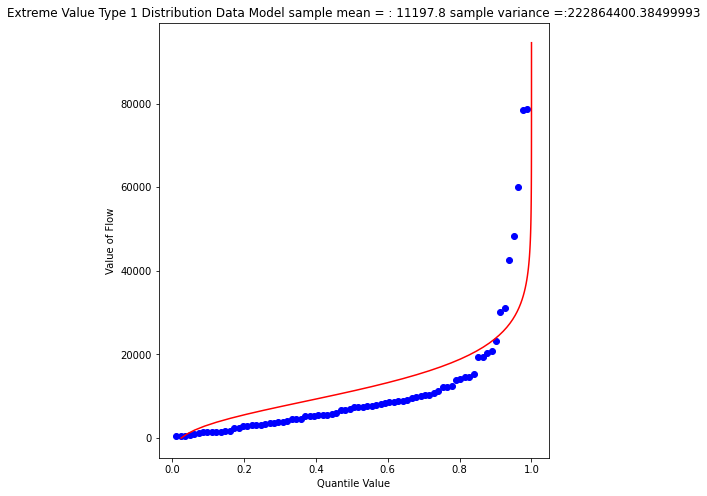

In [68]:
# Fitting Data to Gumbell EV1 Data Model 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, flow4 ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of Flow") 
mytitle = "Extreme Value Type 1 Distribution Data Model sample mean = : " + str(flow4_mean)+ " sample variance =:" + str(flow4_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

## Gumbell Double Exponential (EV1) Distribution Data Model
|Exceedence Probability|Flow Value|Remarks|
|:---|:---|:---|
|25% |????| 75% chance of greater value|           
|50% |????| 50% chance of greater value|            
|75% |????| 25% chance of greater value|            
|90% |????| 10% chance of greater value|
|99% |????| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|????| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|????| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

<hr>

In [37]:
from scipy.optimize import newton

myguess= 4000
def f(x):
    alpha = 8730.888840854457
    beta = 6717.889629784229
    quantile = 0.25
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist - quantile

print(newton(f, myguess))
print(ev1dist(newton(f, myguess),alpha_mom,beta_mom))
##############################################################
def f(x):
    alpha = 8730.888840854457
    beta = 6717.889629784229
    quantile = 0.50
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist - quantile

print(newton(f, myguess))
print(ev1dist(newton(f, myguess),alpha_mom,beta_mom))
##############################################################
def f(x):
    alpha = 8730.888840854457
    beta = 6717.889629784229
    quantile = 0.75
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist - quantile

print(newton(f, myguess))
print(ev1dist(newton(f, myguess),alpha_mom,beta_mom))
##############################################################
def f(x):
    alpha = 8730.888840854457
    beta = 6717.889629784229
    quantile = 0.90
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist - quantile

print(newton(f, myguess))
print(ev1dist(newton(f, myguess),alpha_mom,beta_mom))
##############################################################
def f(x):
    alpha = 8730.888840854457
    beta = 6717.889629784229
    quantile = 0.99
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist - quantile

print(newton(f, myguess))
print(ev1dist(newton(f, myguess),alpha_mom,beta_mom))
##############################################################
def f(x):
    alpha = 8730.888840854457
    beta = 6717.889629784229
    quantile = 0.998
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist - quantile

print(newton(f, myguess))
print(ev1dist(newton(f, myguess),alpha_mom,beta_mom))
##############################################################
def f(x):
    alpha = 8730.888840854457
    beta = 6717.889629784229
    quantile = 0.999
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist - quantile

print(newton(f, myguess))
print(ev1dist(newton(f, myguess),alpha_mom,beta_mom))
##############################################################

6536.595933014118
0.25
11193.082189211951
0.5
17100.702987342494
0.7499999999999999
23848.60817221199
0.9
39634.18362687675
0.99
50473.21664381971
0.998
55133.066049399946
0.999


In [69]:
# Gamma (Pearson Type III) Quantile Function
import scipy.stats # import scipy stats package
import math        # import math package
import numpy       # import numpy package
# log and antilog
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))
def antiloggit(x):  # A prototype function to log transform x
    return(math.exp(x))
def weibull_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    weibull_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        weibull_pp.append((i+1)/(len(sample)+1))
    return weibull_pp
def gammacdf(x,tau,alpha,beta): # Gamma Cumulative Density function - with three parameter to one parameter convert
    xhat = x-tau
    lamda = 1.0/beta
    gammacdf = scipy.stats.gamma.cdf(lamda*xhat, alpha)
    return gammacdf

In [70]:
flow5 = df['flow'].tolist() # put the log peaks into a list
flow5_mean  = np.array(flow5).mean()
flow5_stdev = np.array(flow5).std()
flow5_skew  = scipy.stats.skew(flow5)
flow5_alpha = 4.0/(flow5_skew**2)
flow5_beta  = np.sign(flow5_skew)*math.sqrt(flow5_stdev**2/flow5_alpha)
flow5_tau   = flow5_mean - flow5_alpha*flow5_beta
#
plotting = weibull_pp(flow5)
#
x = []; ycdf = []
xlow = (0.9*min(flow5)); xhigh = (1.1*max(flow5)) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = gammacdf(xlow + i*xstep,flow5_tau,flow5_alpha,flow5_beta)
    ycdf.append(yvalue) 

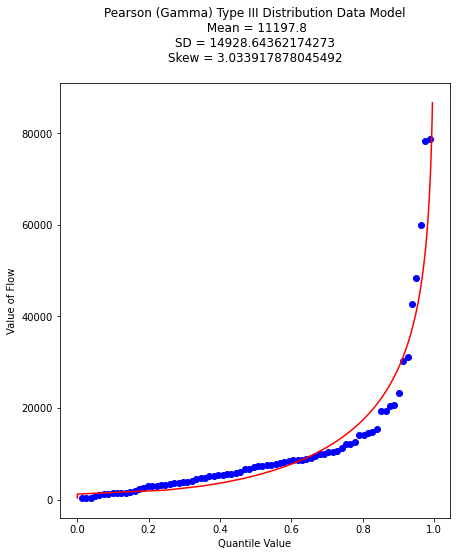

In [71]:
# Fitting Data to Pearson (Gamma) III Data Model 
# This is new, in lecture the fit was to log-Pearson, same procedure, but not log transformed
myfigure = matplotlib.pyplot.figure(figsize = (7,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(plotting, flow5 ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of Flow") 
mytitle = "Pearson (Gamma) Type III Distribution Data Model\n "
mytitle += "Mean = " + str(flow5_mean) + "\n"
mytitle += "SD = " + str(flow5_stdev) + "\n"
mytitle += "Skew = " + str(flow5_skew) + "\n"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

## Pearson III Distribution Data Model 
|Exceedence Probability|Flow Value|Remarks|
|:---|:---|:---|
|25% |????| 75% chance of greater value|           
|50% |????| 50% chance of greater value|            
|75% |????| 25% chance of greater value|            
|90% |????| 10% chance of greater value|
|99% |????| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|????| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|????| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

<hr>

In [41]:
print(flow5_tau)
print(flow5_alpha)
print(flow5_beta)

1356.6347332854966
0.43456260236933913
22646.13938948754


In [42]:
from scipy.optimize import newton
myguess = 4000
def f(x):
    sample_tau = 1356.6347332854966
    sample_alpha = 0.43456260236933913
    sample_beta = 22646.13938948754
    quantile = 0.25
    #argument = loggit(x)
    gammavalue = gammacdf(x,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

print(newton(f, myguess))
print(round(gammacdf(newton(f, myguess),flow5_tau,flow5_alpha,flow5_beta),4))
#####################################################################################
def f(x):
    sample_tau = 1356.6347332854966
    sample_alpha = 0.43456260236933913
    sample_beta = 22646.13938948754
    quantile = 0.50
    #argument = loggit(x)
    gammavalue = gammacdf(x,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

print(newton(f, myguess))
print(round(gammacdf(newton(f, myguess),flow5_tau,flow5_alpha,flow5_beta),4))
#####################################################################################
def f(x):
    sample_tau = 1356.6347332854966
    sample_alpha = 0.43456260236933913
    sample_beta = 22646.13938948754
    quantile = 0.75
    #argument = loggit(x)
    gammavalue = gammacdf(x,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

print(newton(f, myguess))
print(round(gammacdf(newton(f, myguess),flow5_tau,flow5_alpha,flow5_beta),4))
#####################################################################################
def f(x):
    sample_tau = 1356.6347332854966
    sample_alpha = 0.43456260236933913
    sample_beta = 22646.13938948754
    quantile = 0.90
    #argument = loggit(x)
    gammavalue = gammacdf(x,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

print(newton(f, myguess))
print(round(gammacdf(newton(f, myguess),flow5_tau,flow5_alpha,flow5_beta),4))
#####################################################################################
def f(x):
    sample_tau = 1356.6347332854966
    sample_alpha = 0.43456260236933913
    sample_beta = 22646.13938948754
    quantile = 0.99
    #argument = loggit(x)
    gammavalue = gammacdf(x,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

print(newton(f, myguess))
print(round(gammacdf(newton(f, myguess),flow5_tau,flow5_alpha,flow5_beta),4))
#####################################################################################
def f(x):
    sample_tau = 1356.6347332854966
    sample_alpha = 0.43456260236933913
    sample_beta = 22646.13938948754
    quantile = 0.998
    #argument = loggit(x)
    gammavalue = gammacdf(x,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

print(newton(f, myguess))
print(round(gammacdf(newton(f, myguess),flow5_tau,flow5_alpha,flow5_beta),4))
#####################################################################################
def f(x):
    sample_tau = 1356.6347332854966
    sample_alpha = 0.43456260236933913
    sample_beta = 22646.13938948754
    quantile = 0.999
    #argument = loggit(x)
    gammavalue = gammacdf(x,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

print(newton(f, myguess))
print(round(gammacdf(newton(f, myguess),flow5_tau,flow5_alpha,flow5_beta),4))
#####################################################################################

2077.9070960392946
0.25
5267.02594598091
0.5
14029.404138740409
0.75
28734.914752838442
0.9
71869.9637302461
0.99
104294.440621576
0.998
118564.83951972787
0.999


In [72]:
# Fitting Data to Log-Pearson (Log-Gamma) III Data Model 
flow6 = df['flow'].apply(loggit).tolist() # put the log peaks into a list
flow6_mean  = np.array(flow6).mean()
flow6_stdev = np.array(flow6).std()
flow6_skew  = scipy.stats.skew(flow6)
flow6_alpha = 4.0/(flow6_skew**2)
flow6_beta  = np.sign(flow6_skew)*math.sqrt(flow6_stdev**2/flow6_alpha)
flow6_tau   = flow6_mean - flow6_alpha*flow6_beta
#
plotting = weibull_pp(flow6)
#
x = []; ycdf = []
xlow = (0.9*min(flow6)); xhigh = (1.1*max(flow6)) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = gammacdf(xlow + i*xstep,flow6_tau,flow6_alpha,flow6_beta)
    ycdf.append(yvalue) 

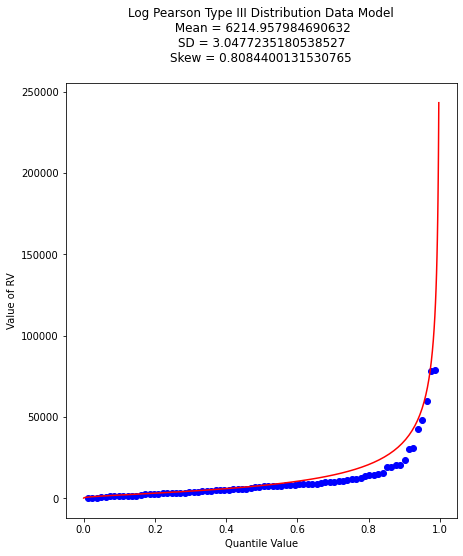

In [73]:
# reverse transform the peaks, and the data model peaks
for i in range(len(flow6)):
    flow6[i] = antiloggit(flow6[i])
for i in range(len(x)):
    x[i] = antiloggit(x[i])

rycdf = ycdf[::-1]
myfigure = matplotlib.pyplot.figure(figsize = (7,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(plotting, flow6 ,color ='blue') 
matplotlib.pyplot.plot(rycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Pearson Type III Distribution Data Model\n "
mytitle += "Mean = " + str(antiloggit(flow6_mean)) + "\n"
mytitle += "SD = " + str(antiloggit(flow6_stdev)) + "\n"
mytitle += "Skew = " + str(antiloggit(flow6_skew)) + "\n"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

___
![](https://media2.giphy.com/media/5nj4ZZWl6QwneEaBX4/source.gif) <br>


*Here are some great reads on this topic:* 
- __"Introduction to Probability distributions"__ by __Megha Singhal__ available at *https://medium.datadriveninvestor.com/introduction-to-probability-distributions-56b5253344b8* <br>
- __"A Gentle Introduction to Probability Distributions"__ by __Jason Brownlee__ available at *https://machinelearningmastery.com/what-are-probability-distributions/*<br>
- __"Python Probability Distributions – Normal, Binomial, Poisson, Bernoulli"__ available at *https://data-flair.training/blogs/python-probability-distributions/*<br>


*Here are some great videos on these topics:* 
- __"Python for Data Analysis: Probability Distributions"__ by __DataDaft__ available at *https://www.youtube.com/watch?v=uial-2girHQ* <br>
- __"Python Tutorial: Probability distributions"__ by __DataCamp__ available at *https://www.youtube.com/watch?v=HR59jIi5tFE* <br>
- __"Statistics basics. Working with probability distributions in SciPy"__ by __HidrologíaUC__ available at *https://www.youtube.com/watch?v=biuz0yS8Z5Y* <br>

___
![](https://media2.giphy.com/media/dNgK7Ws7y176U/200.gif) <br>


## Exercise: Extreme Value Distributions  <br>
![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/Gumbel-Cumulative.svg/650px-Gumbel-Cumulative.svg.png) <br>

### Why do we use EV distributions? What are some of the applications?

#### _Make sure to cite any resources that you may use._ 

![](https://i.pinimg.com/originals/f2/41/bd/f241bd0c7db6ac112b804e9487a849db.jpg)